In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_path = 'StudentsPerformance.csv'

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [132]:
#feature engineering adding of new columns using existing columns
df['passedMath'] = 0  # Lets first initialize the column with 0
df.loc[df['math score'] > 50, 'passedMath'] = 1  # Now set the values to 1 where the condition is met
df['passedReading'] = 0   # Lets first initialize the column with 0
df.loc[df['reading score'] > 50, 'passedReading'] = 1 # Now set the values to 1 where the condition is met
df['passedWriting'] = 0   # Lets first initialize the column with 0
df.loc[df['writing score'] > 50, 'passedWriting'] = 1 # Now set the values to 1 where the condition is met


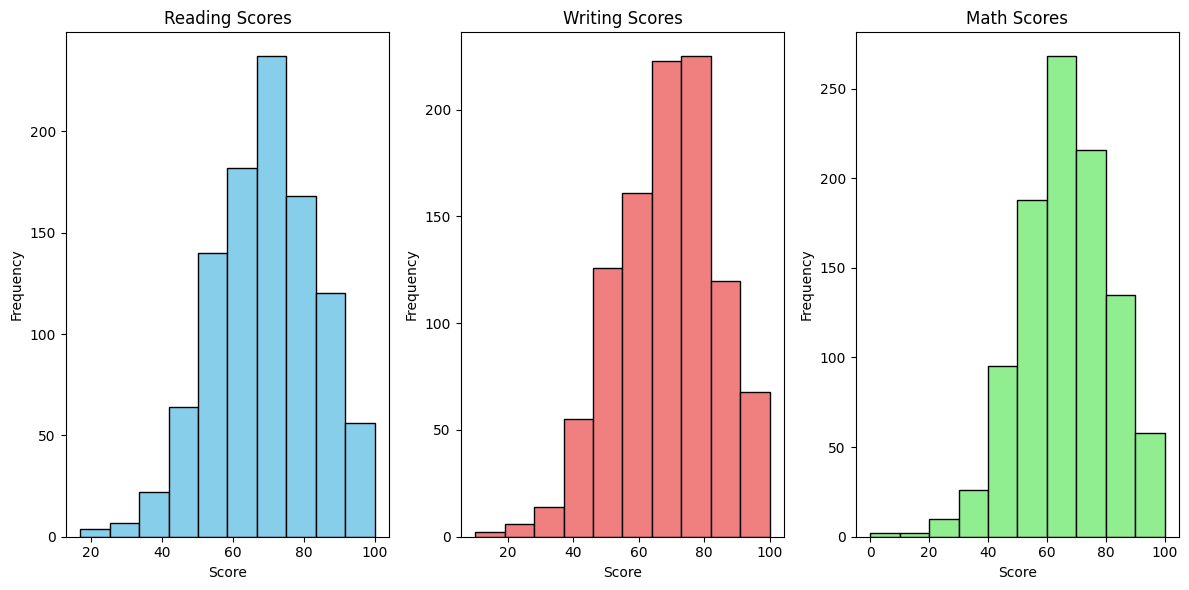

In [133]:
# Creating histograms for Reading, Writing, and Math Scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df['reading score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Reading Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['writing score'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Writing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['math score'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Math Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


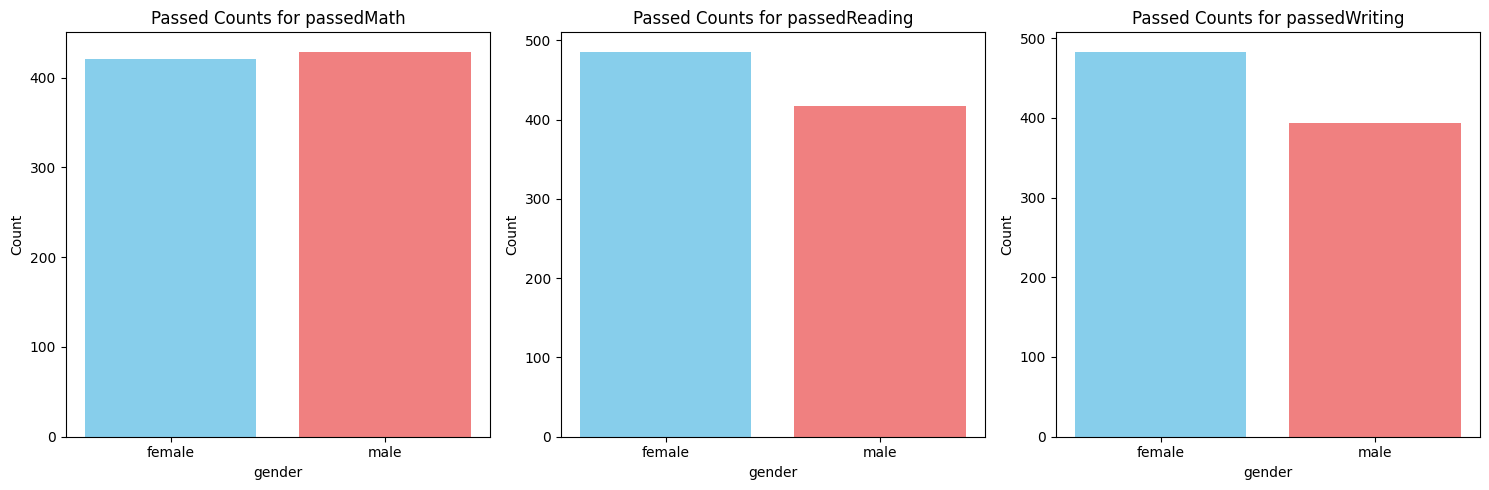

In [134]:

# Grouping by 'Gender'
grouped = df.groupby('gender')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterating through subjects and plot histograms separately for each gender
for i, subject in enumerate(['passedMath', 'passedReading', 'passedWriting']):
    passed_counts = [group[subject].sum() for name, group in grouped]
    labels = [name for name, _ in grouped]
    axes[i].bar(labels, passed_counts, color=['skyblue', 'lightcoral'])
    axes[i].set_title(f'Passed Counts for {subject}')
    axes[i].set_xlabel('gender')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


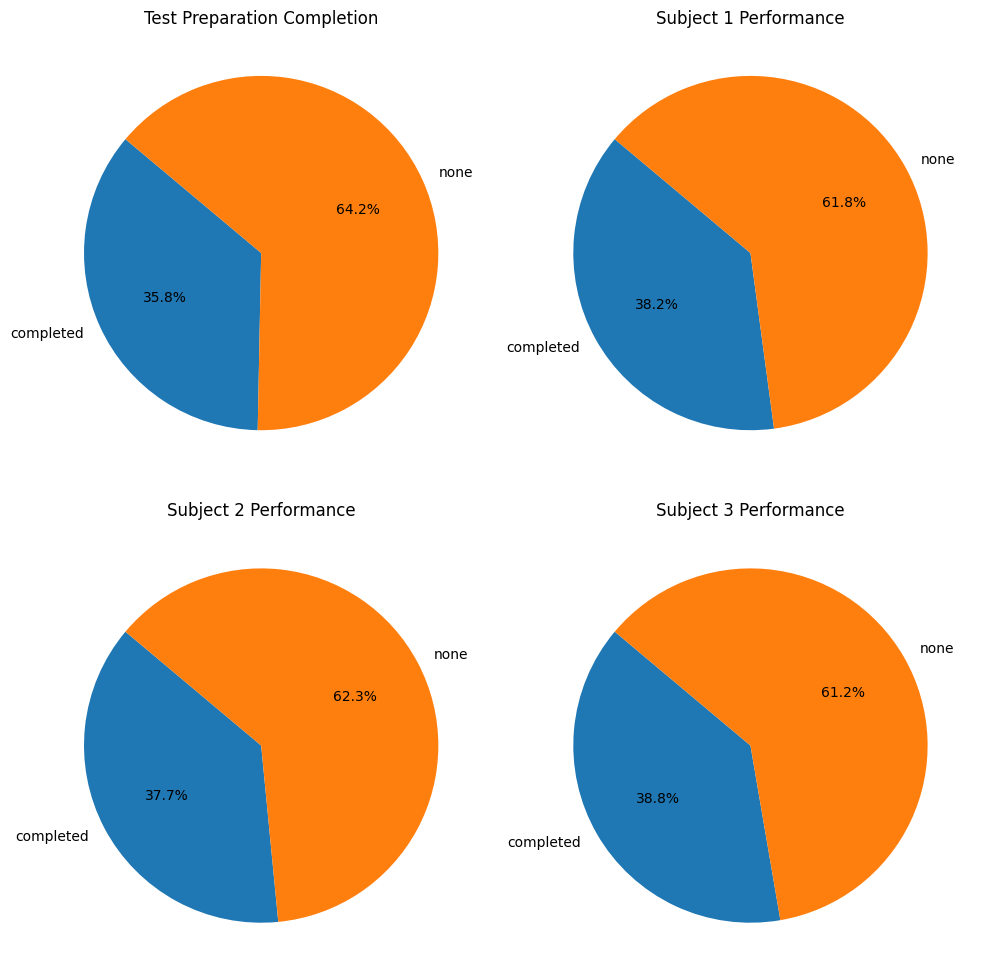

In [135]:


# Grouping by 'test preparation course' and count the number of students
grouped = df.groupby('test preparation course').size()

# Group by 'test preparation course' and sum the 'subject' columns
subject_grouped = df.groupby('test preparation course')[['passedMath', 'passedReading', 'passedWriting']].sum()

# Create pie charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Pie chart for test preparation completion
axes[0, 0].pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Test Preparation Completion')

# Pie charts for subject performance
for i, col in enumerate(subject_grouped.columns):
    axes[(i+1)//2, (i+1)%2].pie(subject_grouped[col], labels=subject_grouped.index, autopct='%1.1f%%', startangle=140)
    axes[(i+1)//2, (i+1)%2].set_title(f'Subject {i+1} Performance')

plt.tight_layout()
plt.show()


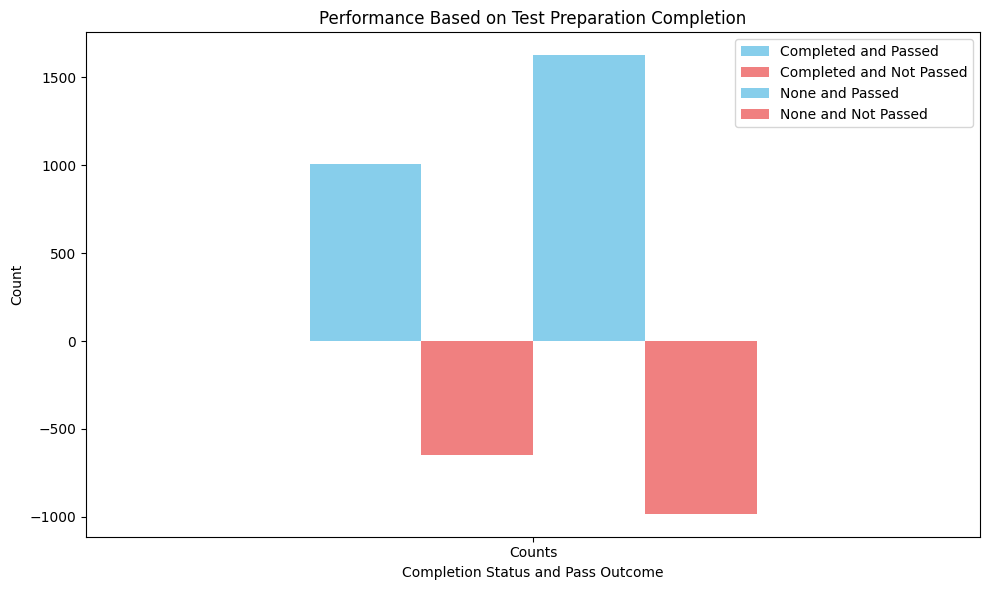

In [136]:


# Grouped by 'test preparation course' and count the number of students
grouped = df.groupby('test preparation course').size()

# Group by 'test preparation course' and sum the 'Subject' columns
subject_grouped = df.groupby('test preparation course')[['passedMath', 'passedReading', 'passedWriting']].sum()

# Create a new DataFrame to store the counts of passed and not passed for each group
pass_counts = pd.DataFrame({
    'Completed and Passed': subject_grouped.loc['completed'].sum(),
    'Completed and Not Passed': grouped['completed'] - subject_grouped.loc['completed'].sum(),
    'None and Passed': subject_grouped.loc['none'].sum(),
    'None and Not Passed': grouped['none'] - subject_grouped.loc['none'].sum()
}, index=['Counts'])

# Create a grouped bar chart
pass_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])


plt.title('Performance Based on Test Preparation Completion')
plt.xlabel('Completion Status and Pass Outcome')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


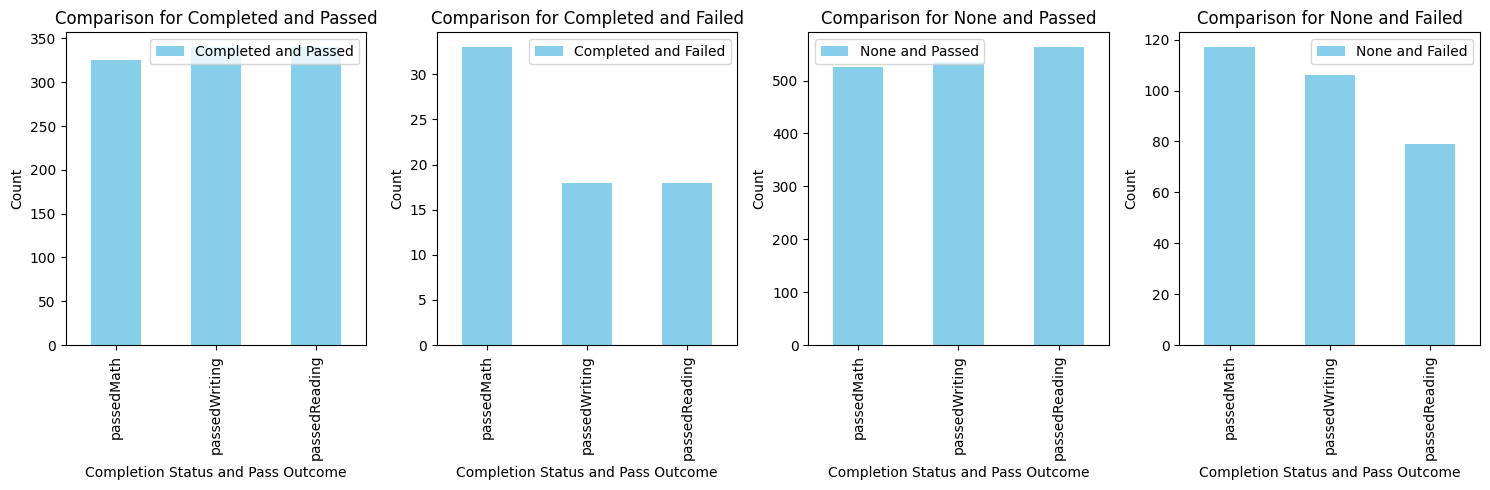

In [137]:



# Grouped by 'test preparation course' and count the number of students
grouped = df.groupby('test preparation course').size()

# Group by 'test preparation course' and sum the 'passedMath' columns
passed_grouped = df.groupby('test preparation course')[['passedMath', 'passedWriting', 'passedReading']].sum()

# Create a new DataFrame to store the counts of passed and failed for each group
pass_counts = pd.DataFrame({
    'Completed and Passed': passed_grouped.loc['completed'],
    'Completed and Failed': grouped['completed'] - passed_grouped.loc['completed'],
    'None and Passed': passed_grouped.loc['none'],
    'None and Failed': grouped['none'] - passed_grouped.loc['none']
})

# Create grouped bar charts for each column
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

for i, col in enumerate(pass_counts.columns):
    pass_counts[[col]].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])
    axes[i].set_title(f'Comparison for {col}')
    axes[i].set_xlabel('Completion Status and Pass Outcome')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


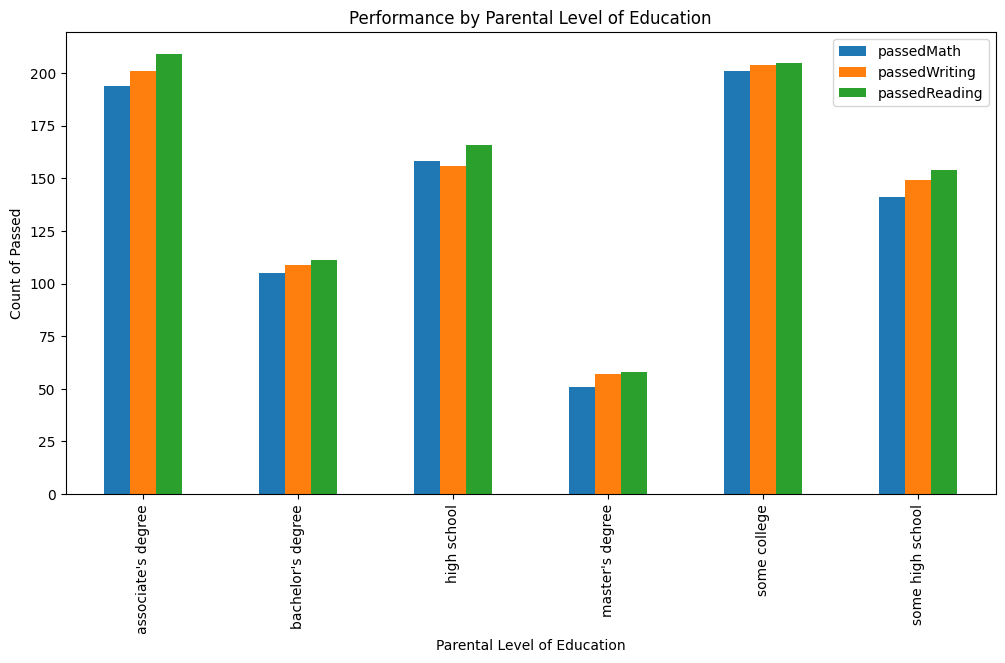

In [138]:

# Group by 'parental level of education' and sum the 'Passed' columns
education_grouped = df.groupby('parental level of education')[['passedMath', 'passedWriting', 'passedReading']].sum()

# Grouped Bar Chart
education_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Performance by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count of Passed')


plt.show()


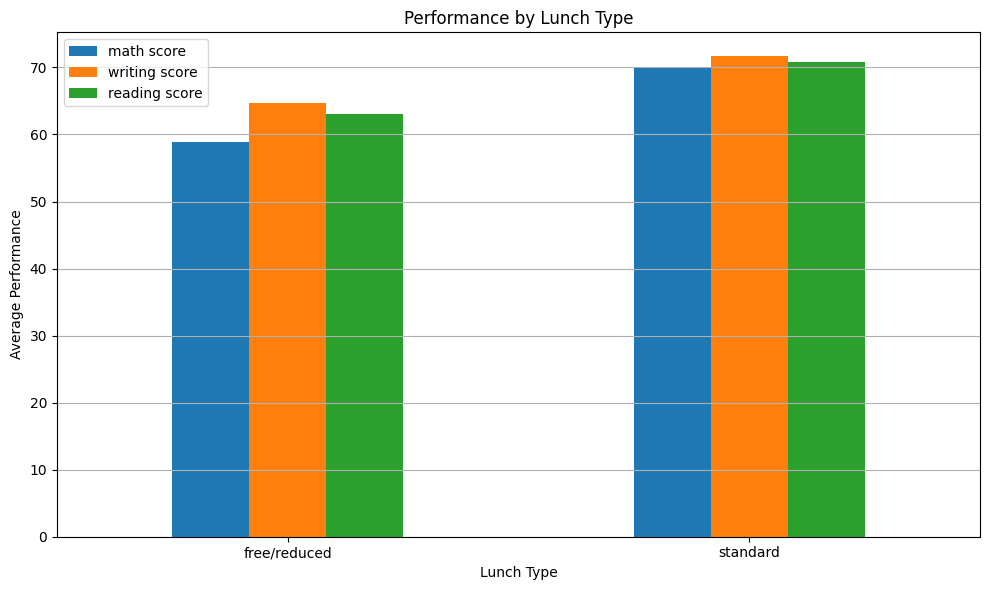

In [139]:


# Grouped by 'Lunch' and calculate the mean of the subject score columns
lunch_grouped = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
# Plot the grouped bar chart
lunch_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Performance by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Performance')
plt.xticks(rotation=0)
plt.legend(['math score', 'writing score', 'reading score'])
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


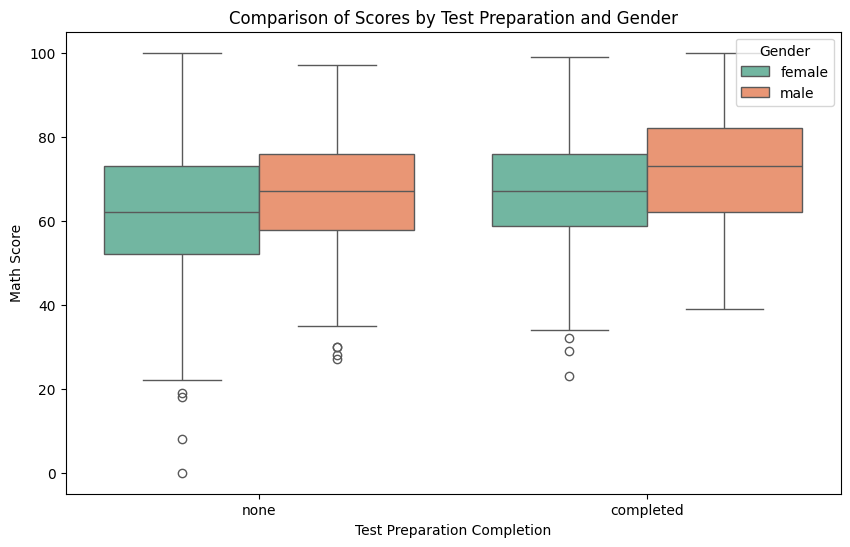

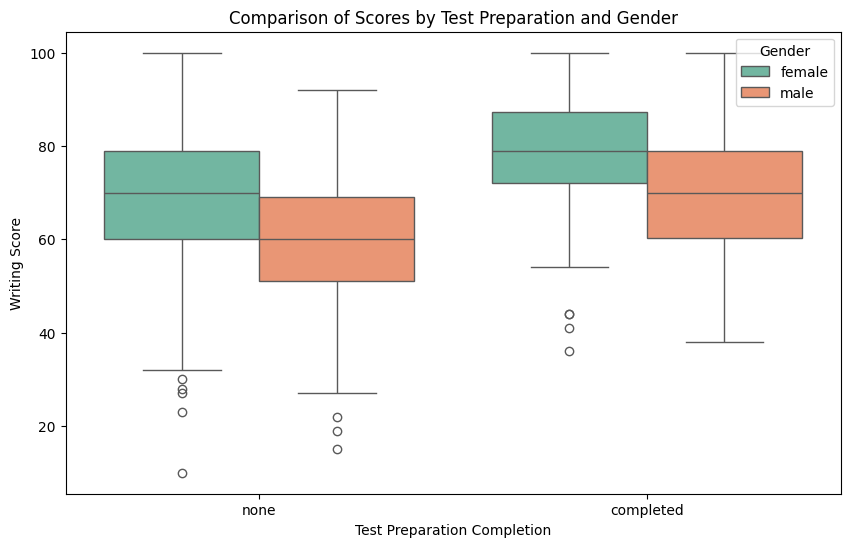

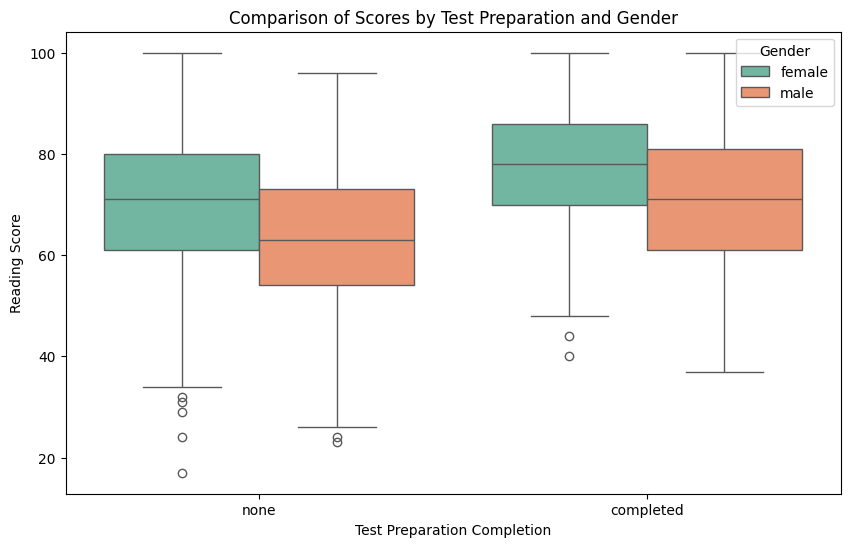

In [140]:

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns: 'Gender', 'Test_Preparation', 'Score_Type', 'Score'

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='math score', hue='gender', data=df, palette='Set2')
plt.title('Comparison of Scores by Test Preparation and Gender')
plt.xlabel('Test Preparation Completion')
plt.ylabel('Math Score')
plt.legend(title='Gender', loc='upper right')
plt.show()
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='writing score', hue='gender', data=df, palette='Set2')
plt.title('Comparison of Scores by Test Preparation and Gender')
plt.xlabel('Test Preparation Completion')
plt.ylabel('Writing Score')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='reading score', hue='gender', data=df, palette='Set2')
plt.title('Comparison of Scores by Test Preparation and Gender')
plt.xlabel('Test Preparation Completion')
plt.ylabel('Reading Score')
plt.legend(title='Gender', loc='upper right')
plt.show()



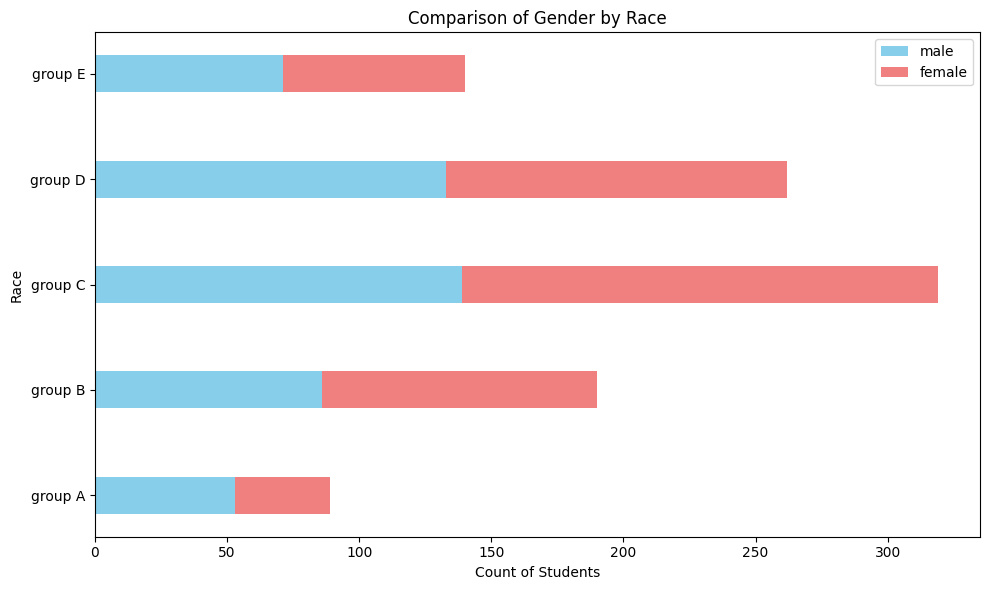

In [141]:

# Grouped by 'race/ethnicity' and 'gender' and count the number of students
grouped = df.groupby(['race/ethnicity', 'gender']).size().unstack(fill_value=0)

# Create butterfly plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of bars
bar_width = 0.35

# Define positions for the bars
index = np.arange(len(grouped.index))

# Plot bars for combined 'Male' and 'Female'
ax.barh(index, grouped['male'], bar_width, label='male', color='skyblue')
ax.barh(index, grouped['female'], bar_width, label='female', color='lightcoral', left=grouped['male'])

# Add labels, title, and legend
ax.set_xlabel('Count of Students')
ax.set_ylabel('Race')
ax.set_title('Comparison of Gender by Race')
ax.set_yticks(index)
ax.set_yticklabels(grouped.index)
ax.legend()

plt.tight_layout()
plt.show()
